# Q1




50
101
105
256


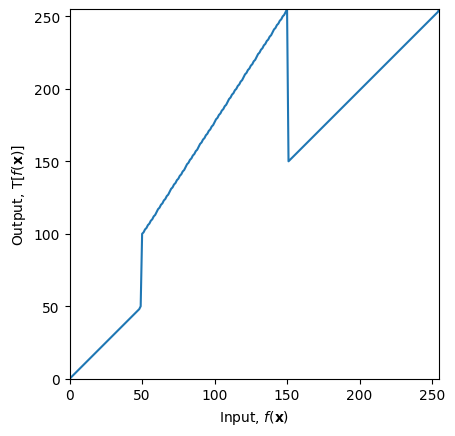

In [1]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
c = np.array([(50, 50),(50, 100),(150, 255),(150,150),(255,255)])
t1 = np.linspace(0,50,50).astype(np.uint8)
print(len(t1))
t2 = np.linspace(100,255,100+1).astype(np.uint8)
print(len(t2))
t3 = np.linspace(150,255,105).astype(np.uint8)
print(len(t3))
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0 ,255)
ax.set_ylim(0 ,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show( )
img_orig = cv.imread('C:/Users/Dell/.ipython/emma.jpg' , cv . IMREAD_GRAYSCALE)
cv . namedWindow("Image" , cv .WINDOW_AUTOSIZE)
cv . imshow("Image" , img_orig)
cv . waitKey (0)
image_transformed = cv.LUT(img_orig , transform)
cv . imshow("Image", image_transformed)
cv . waitKey (0)
cv . destroyAllWindows ()


# Q2

# (a)

181
55
20
256


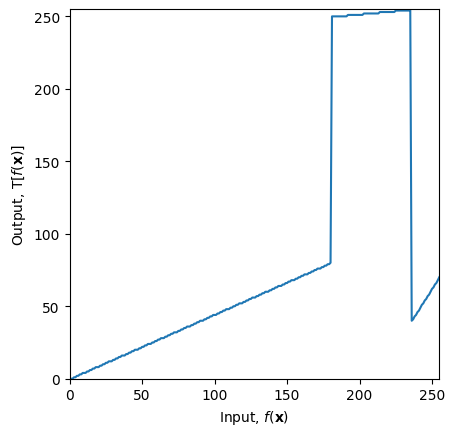

In [3]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

t1 = np.linspace(0,80,180+1).astype(np.uint8)
print(len(t1))
t2 = np.linspace(250,255,55).astype(np.uint8)
print(len(t2))
t3 = np.linspace(40,70,20).astype(np.uint8)
print(len(t3))
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0 ,255)
ax.set_ylim(0 ,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show( )
img_orig = cv.imread('C:/Users/Dell/.ipython/brain.png' , cv . IMREAD_GRAYSCALE)
cv . namedWindow("Image" , cv .WINDOW_AUTOSIZE)
cv . imshow("Image" , img_orig)
cv . waitKey (0)
image_transformed = cv.LUT(img_orig , transform)
cv . imshow("Image with white matter ", image_transformed)
cv . waitKey (0)
cv . destroyAllWindows ()



# (b)

121
48
87
256


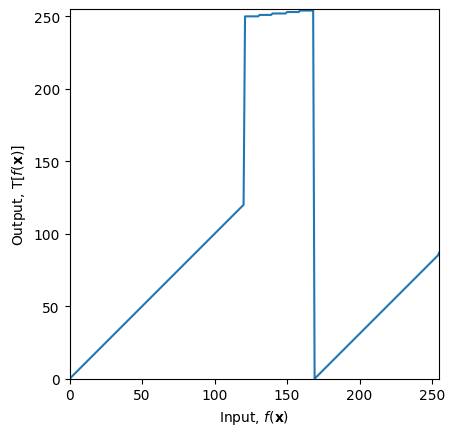

In [61]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

t1 = np.linspace(0,120,120+1).astype(np.uint8)
print(len(t1))
t2 = np.linspace(250,255,48).astype(np.uint8)
print(len(t2))
t3 = np.linspace(0,87,87).astype(np.uint8)
print(len(t3))
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0 ,255)
ax.set_ylim(0 ,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show( )
img_orig = cv.imread('C:/Users/Dell/.ipython/brain.png' , cv . IMREAD_GRAYSCALE)
cv . namedWindow("Image" , cv .WINDOW_AUTOSIZE)
cv . imshow("Image" , img_orig)
cv . waitKey (0)
image_transformed = cv.LUT(img_orig , transform)
cv . imshow("Image with gray matter ", image_transformed)
cv . waitKey (0)
cv . destroyAllWindows ()


# Q3

gamma taken as 2.2

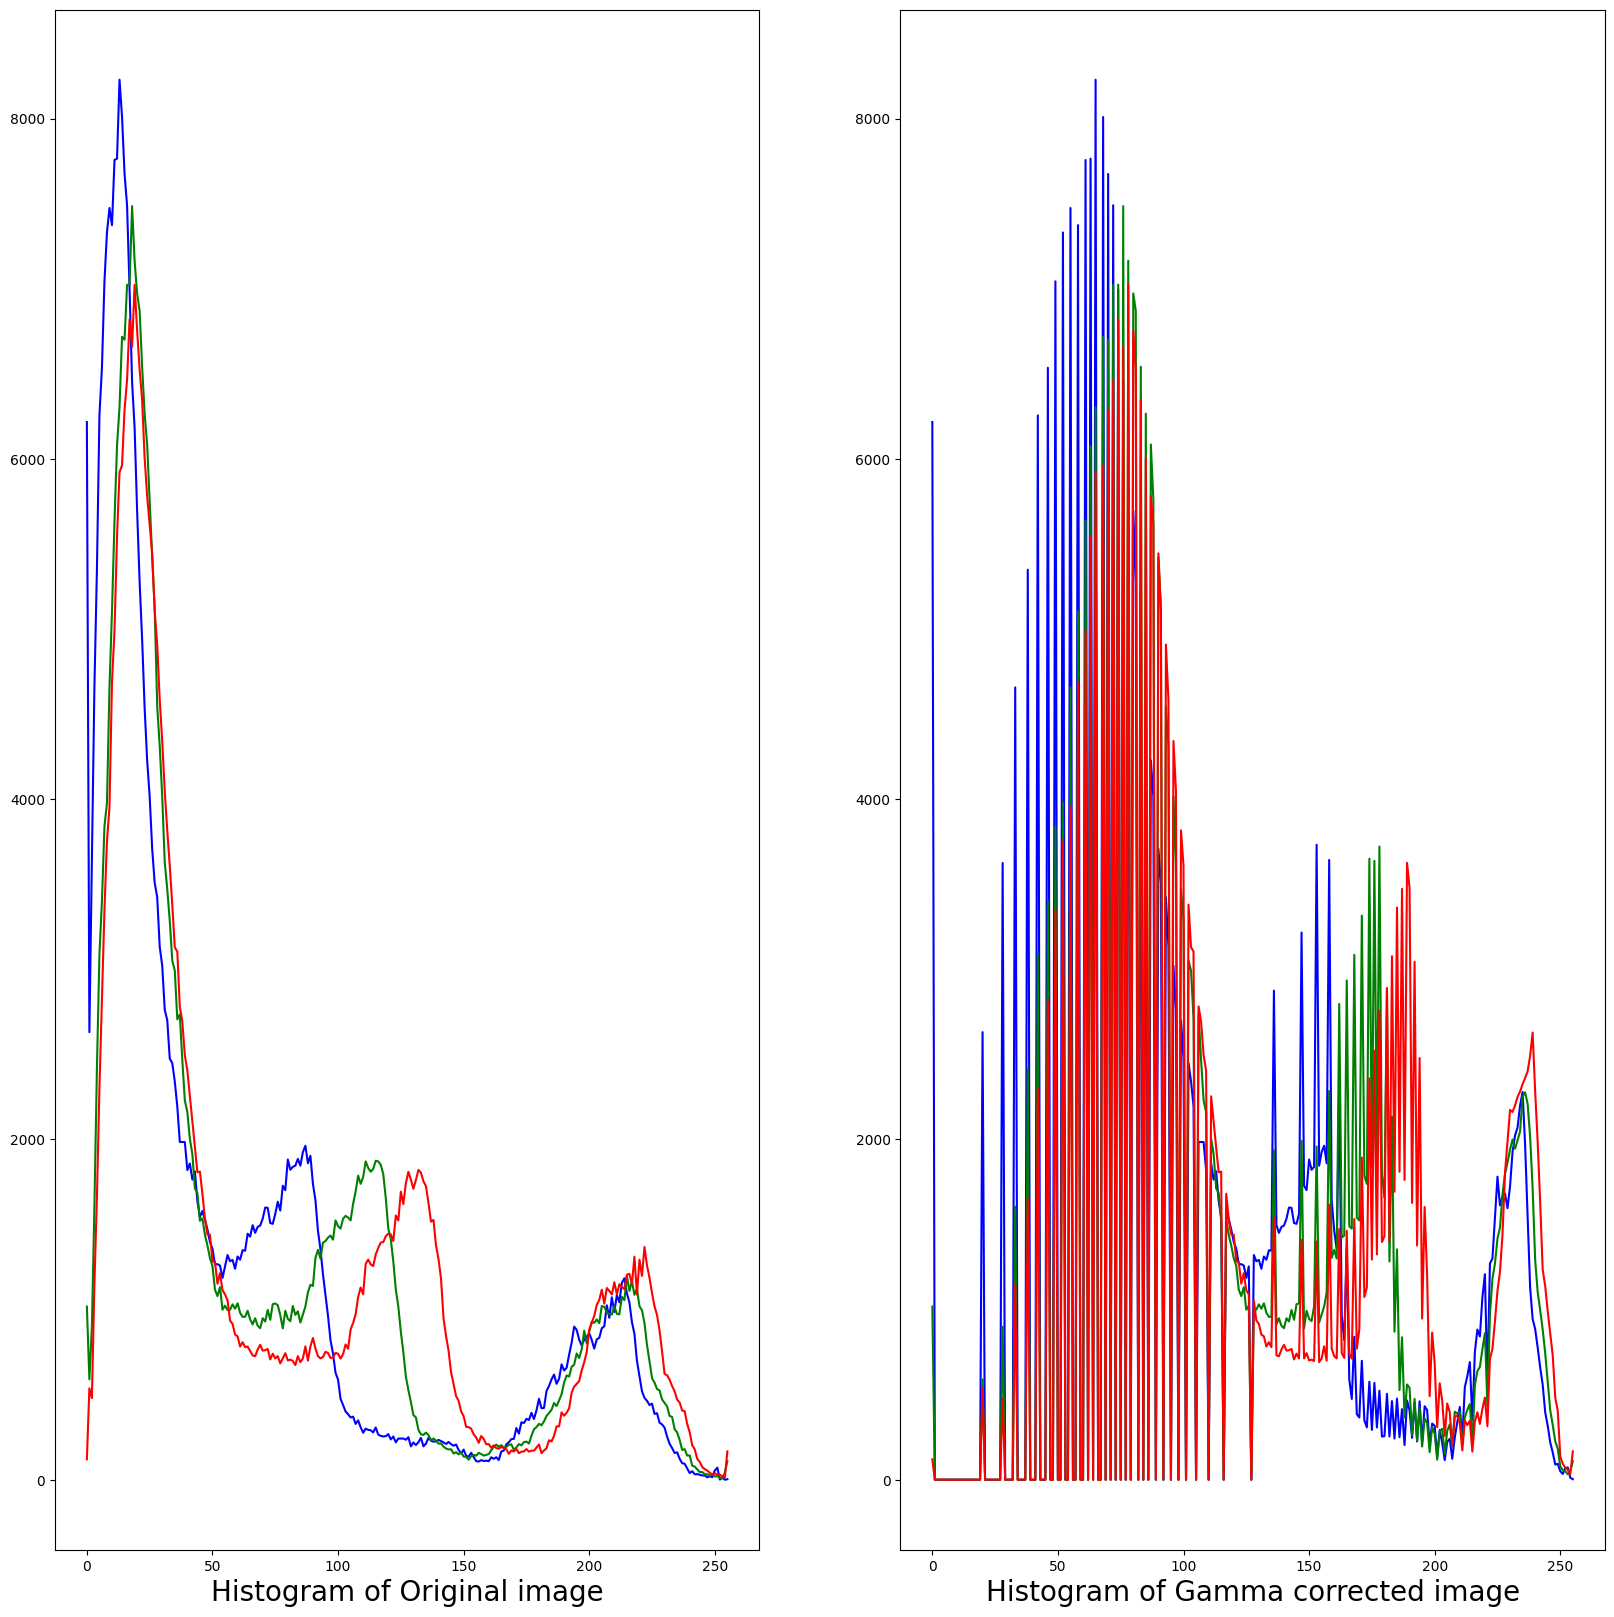

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv.LUT(src, table)


img = cv.imread('C:/Users/Dell/.ipython/highlights_and_shadows.jpg')
gammaImg = gammaCorrection(img, 2.2)

hist_b = cv.calcHist([img],[0], None, [256], [0,256])
hist_g = cv.calcHist([img],[1], None, [256], [0,256])
hist_r = cv.calcHist([img],[2], None, [256], [0,256])

c_hist_b = cv.calcHist([gammaImg],[0], None, [256], [0,256])
c_hist_g = cv.calcHist([gammaImg],[1], None, [256], [0,256])
c_hist_r = cv.calcHist([gammaImg],[2], None, [256], [0,256])

fig, ax = plt.subplots(1,2, figsize=(20,20))
ax[0].plot(hist_b, 'b')
ax[0].plot(hist_g, 'g')
ax[0].plot(hist_r, 'r')
ax[0].set_xlabel('Histogram of Original image',fontsize=20)
ax[1].plot(c_hist_b, 'b')
ax[1].plot(c_hist_g, 'g')
ax[1].plot(c_hist_r, 'r')
ax[1].set_xlabel('Histogram of Gamma corrected image',fontsize=20)
cv.imshow('Original image', img)
cv.imshow('Gamma corrected image', gammaImg)
cv.waitKey(0)
cv.destroyAllWindows()

# Q4

-1

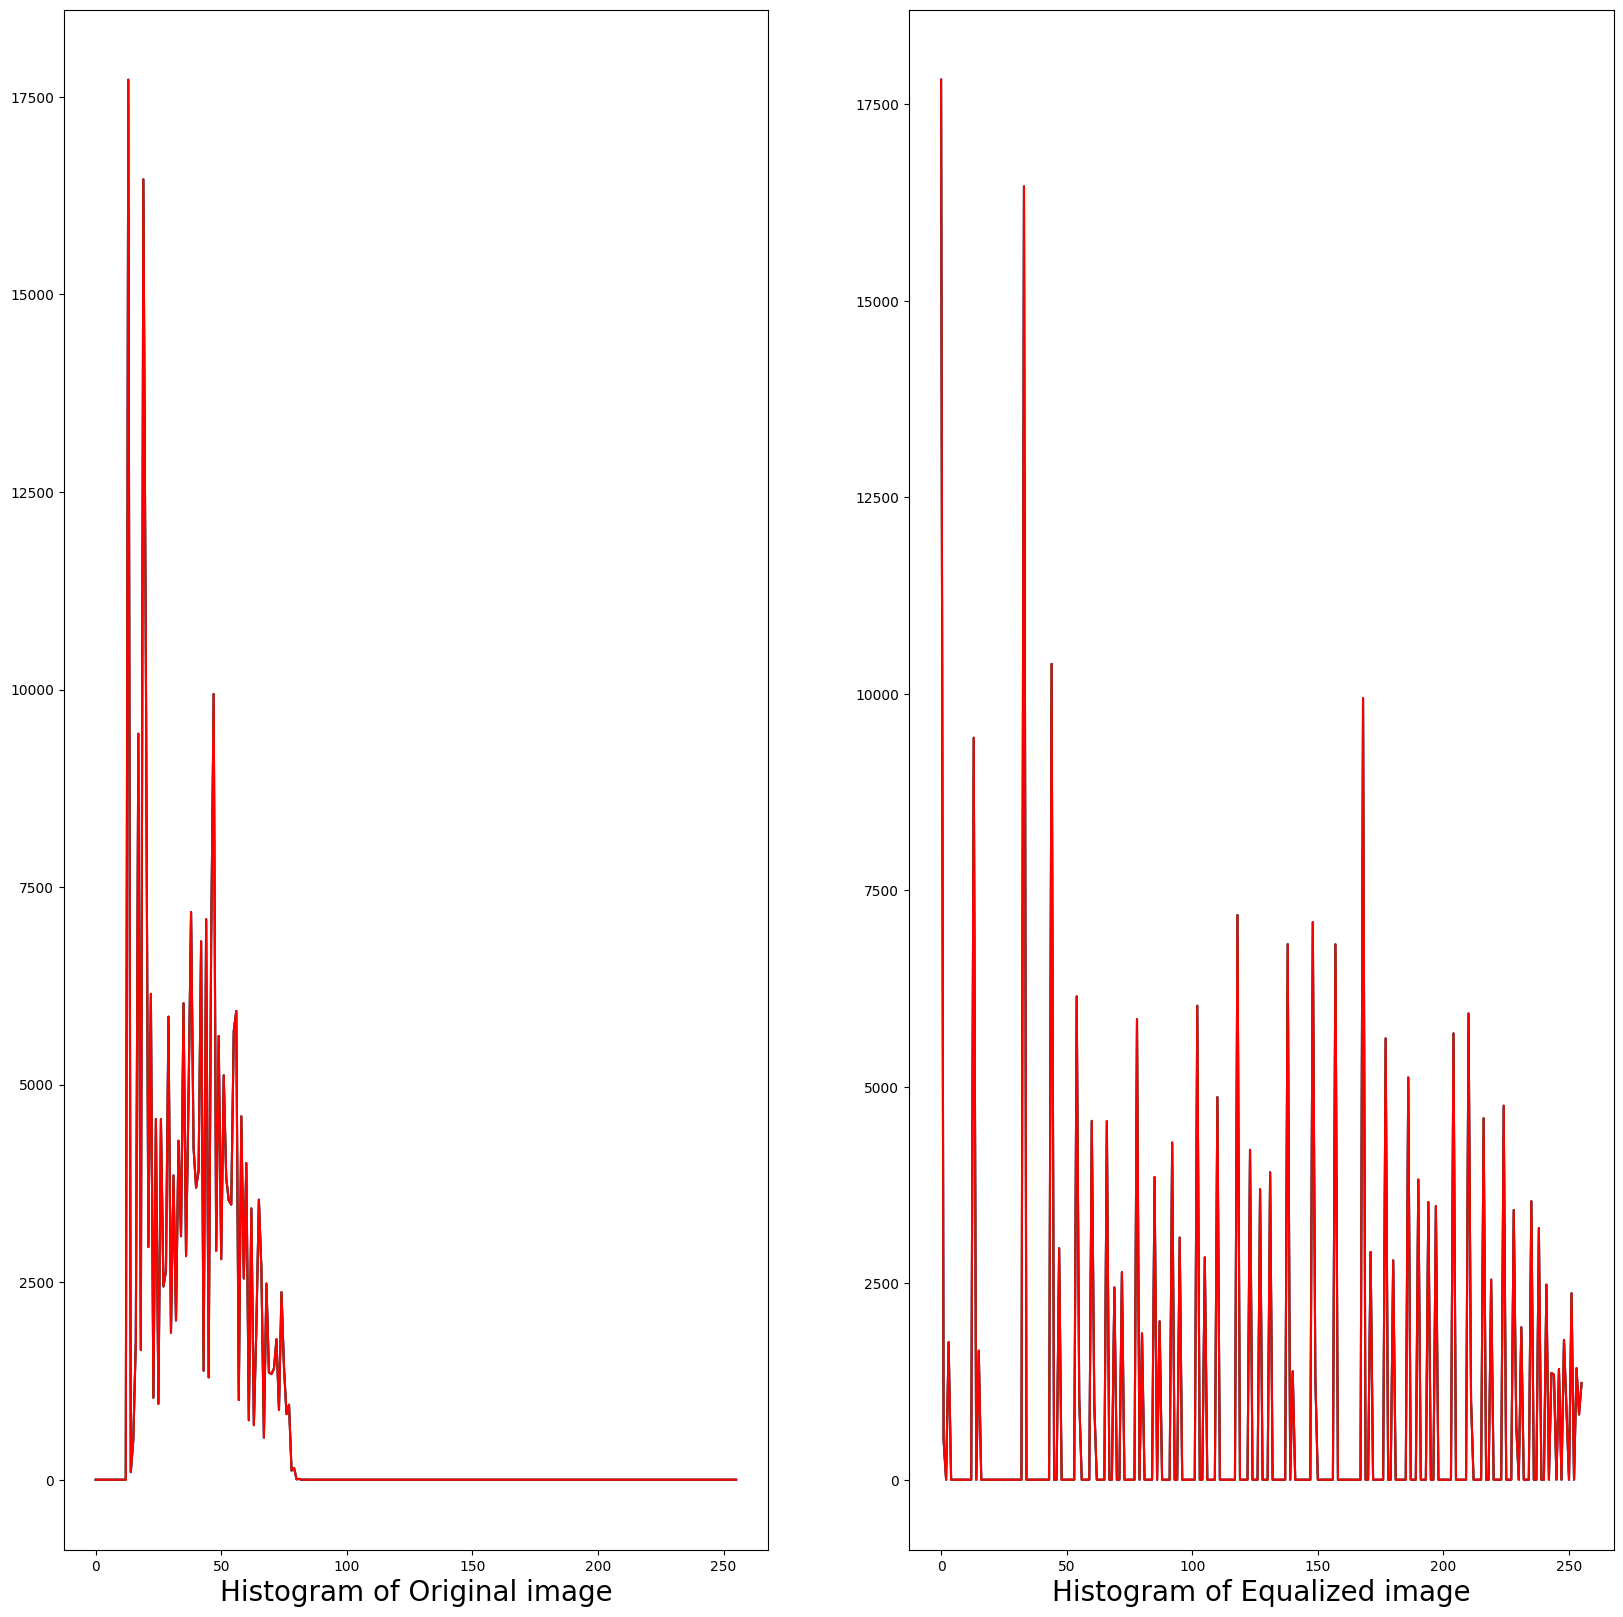

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
 
img = cv.imread('C:/Users/Dell/.ipython/shells.png')

img_yuv = cv.cvtColor(img,cv.COLOR_BGR2YUV)

# apply histogram equalization 
img_yuv[:,:,0] = cv.equalizeHist(img_yuv[:,:,0])
hist_eq = cv.cvtColor(img_yuv, cv.COLOR_YUV2BGR)

hist_b = cv.calcHist([img],[0], None, [256], [0,256])
hist_g = cv.calcHist([img],[1], None, [256], [0,256])
hist_r = cv.calcHist([img],[2], None, [256], [0,256])

eq_hist_b = cv.calcHist([hist_eq],[0], None, [256], [0,256])
eq_hist_g = cv.calcHist([hist_eq],[1], None, [256], [0,256])
eq_hist_r = cv.calcHist([hist_eq],[2], None, [256], [0,256])

fig, ax = plt.subplots(1,2, figsize=(20,20))
ax[0].plot(hist_b, 'b')
ax[0].plot(hist_g, 'g')
ax[0].plot(hist_r, 'r')
ax[0].set_xlabel('Histogram of Original image',fontsize=20)
ax[1].plot(eq_hist_b, 'b')
ax[1].plot(eq_hist_g, 'g')
ax[1].plot(eq_hist_r, 'r')
ax[1].set_xlabel('Histogram of Equalized image',fontsize=20)
cv.imshow("Equalized Histogram", np.hstack((img, hist_eq)))
cv.waitKey(0)

# Q5

In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
 
im = cv.imread('C:/Users/Dell/.ipython/im01.png', cv.IMREAD_REDUCED_GRAYSCALE_2)

scale = 0.25
rows = int(scale*im.shape[0])
cols = int(scale*im.shape[1])

zoomed = np.zeros((rows,cols), dtype=im.dtype)
for i in range(0, rows):
    for j in range(0, cols):
        zoomed[i,j] = im[int(i/scale), int(j/scale)]

cv.namedWindow('Original', cv.WINDOW_AUTOSIZE)
cv.imshow('Original', im)
cv.waitKey(0)
cv.namedWindow('Zoomed', cv.WINDOW_AUTOSIZE)
cv.imshow('Zoomed', zoomed)
cv.waitKey(0)
cv.destroyAllWindows()
